### 1. LOADING FILES

Vamos a realizar un modelado eliminando completamente los datos de 2020, ya que son datos anómalos.

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [5]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model


In [12]:
X_train

,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code
0,12,0,0,1
1,11,1,1,1
2,13,6,0,0
3,11,1,1,1
4,7,6,0,1
...,...,...,...,...
10161,12,6,0,1
10162,11,6,1,1
10163,2,6,0,1
10164,13,6,0,0


Aqui vamos a cargar los modelos para pasar los test

In [16]:
ADA = load_files( 'ADA220913121832.pickle' ) 
BAG = load_files( 'BAG220913121829.pickle' ) 
DTC = load_files( 'DTC220913121816.pickle' ) 
GBCT = load_files( 'GBCT220913121838.pickle' ) 
KNN = load_files( 'KNN220913121847.pickle' ) 
LOGREG = load_files( 'LOGREG220913121842.pickle' ) 
RND = load_files( 'RND220913121824.pickle' ) 

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

### 2. CALCULATING ERROR IN EACH MODEL

In [17]:
def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, xticklabels=[10,20,30,40,50], yticklabels=[10,20,30,40,50],annot=True)
    return df


Accuracy 0.7016819120684568
F1 0.33008955381511346
Precision 0.4144008484658066
Recall 0.35049769845120826
------------------------------
ROC 0.6182298284480019


,ADA
accuracy,0.701682
f-1,0.330090
recall,0.350498
precision,0.414401


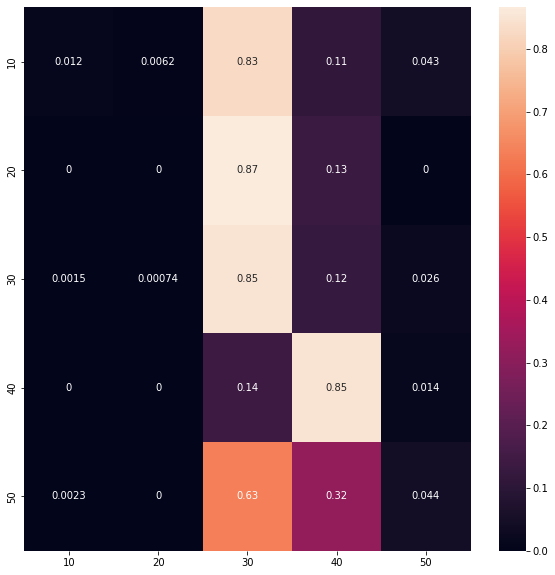

In [18]:
df_ADA= error_modelo(ADA,X_test,y_test)
df_ADA.columns=['ADA']
df_ADA

Accuracy 0.7055178518737091
F1 0.32556057079617606
Precision 0.3885415492036274
Recall 0.3496926359083252
------------------------------
ROC 0.7351522633161369


,BAG
accuracy,0.705518
f-1,0.325561
recall,0.349693
precision,0.388542


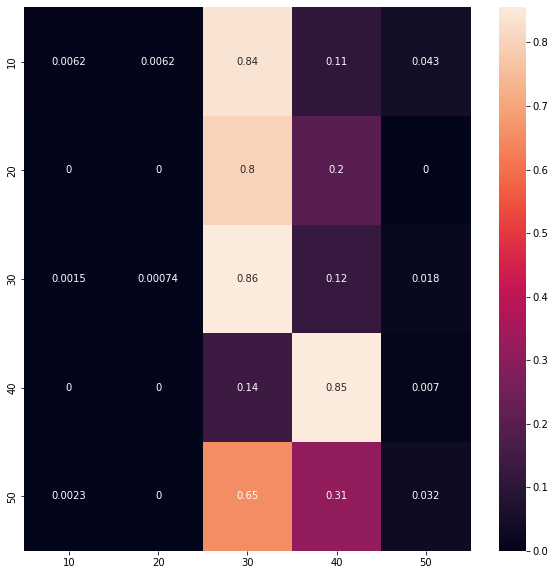

In [20]:
df_BAG = error_modelo(BAG,X_test,y_test)
df_BAG.columns=['BAG']
df_BAG

A partir de aqui tengo que cambiar las siguientes ordenes para cargar los modelos

Accuracy 0.7058129241664207
F1 0.3338497941898747
Precision 0.38180824303405575
Recall 0.35398821286694176
------------------------------
ROC 0.7041456261073468


,DTC
accuracy,0.705813
f-1,0.333850
recall,0.353988
precision,0.381808


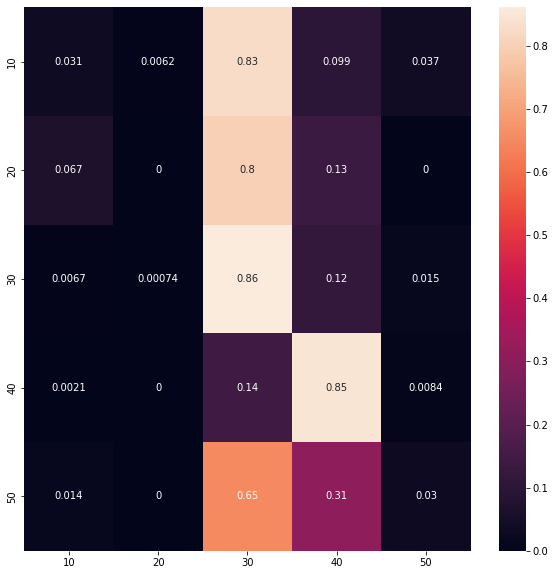

In [21]:
df_DTC = error_modelo(DTC,X_test,y_test)
df_DTC.columns=['DTC']
df_DTC

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.701386839775745
F1 0.3358359914516915
Precision 0.37851061494781024
Recall 0.3532045287877721
------------------------------
ROC 0.7066209696353863


,RND
accuracy,0.701387
f-1,0.335836
recall,0.353205
precision,0.378511


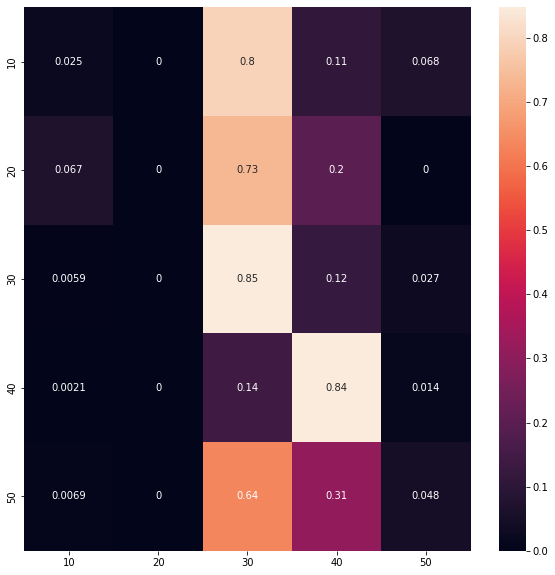

In [22]:
df_RND = error_modelo(RND,X_test,y_test)
df_RND.columns=['RND']
df_RND

Accuracy 0.7117143700206551
F1 0.3245559955154059
Precision 0.42898873479317573
Recall 0.3514969823545809
------------------------------
ROC 0.7436012886315055


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GBCT
accuracy,0.711714
f-1,0.324556
recall,0.351497
precision,0.428989


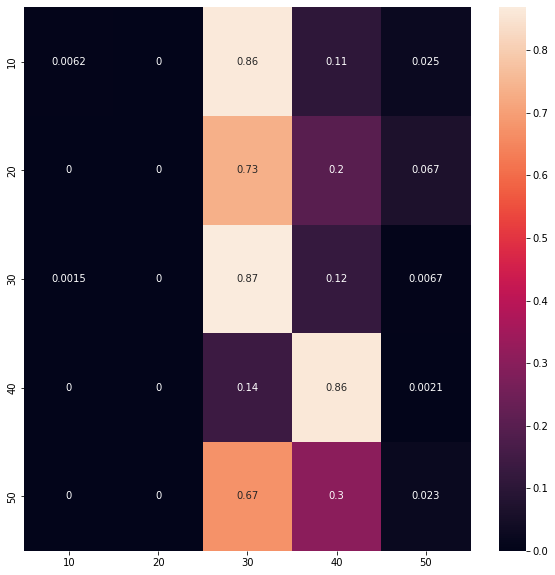

In [23]:
df_GBCT = error_modelo(GBCT,X_test,y_test)
df_GBCT.columns=['GBCT']
df_GBCT

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy 0.3508409560342284
F1 0.19245418666281577
Precision 0.17940461130163637
Recall 0.2265183805783928
------------------------------
ROC 0.5464331188795504


,KNN
accuracy,0.350841
f-1,0.192454
recall,0.226518
precision,0.179405


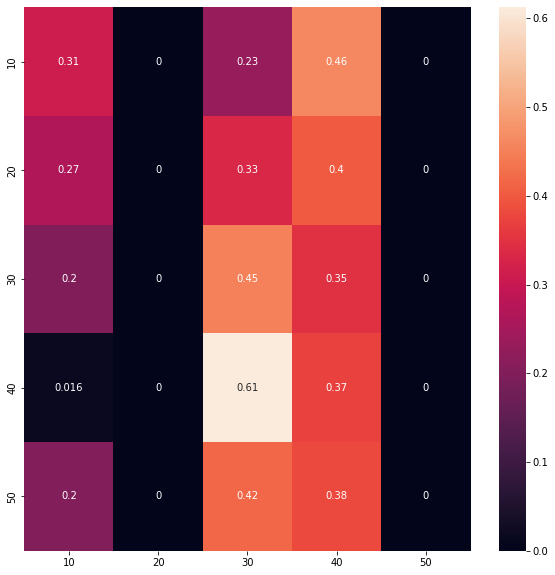

In [24]:
df_KNN = error_modelo(KNN,X_test,y_test)
df_KNN.columns=['KNN']
df_KNN

Accuracy 0.7117143700206551
F1 0.3131272362417886
Precision 0.28612856344326437
Recall 0.3471177303052766
------------------------------
ROC 0.7421405868175084


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,LOGREG
accuracy,0.711714
f-1,0.313127
recall,0.347118
precision,0.286129


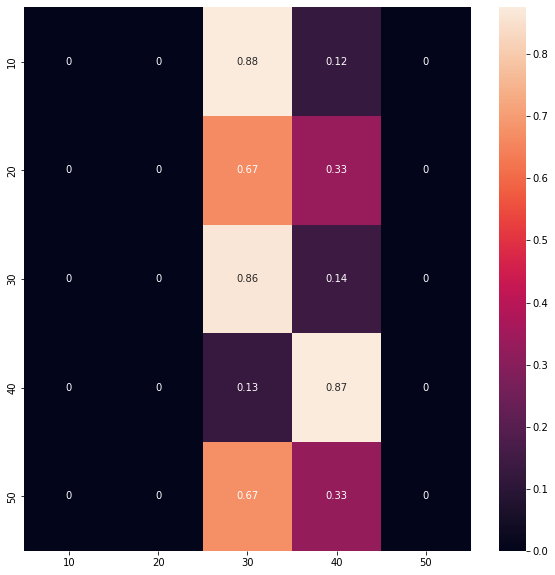

In [25]:
df_LOGREG = error_modelo(LOGREG,X_test,y_test)
df_LOGREG.columns=['LOGREG']
df_LOGREG

Viendo estos datos desechamos los modelos de *REGRESION LOGÍSTICA* y de *K NEAREST NEIGHBORS*, ya que sus métricas están alejadas del resto.

In [26]:
df_errores=pd.DataFrame()

In [27]:
df_errores=pd.concat([df_ADA,df_BAG,df_DTC,df_RND,df_GBCT,df_KNN,df_LOGREG],axis=1)
df_errores

,ADA,BAG,DTC,RND,GBCT,KNN,LOGREG
accuracy,0.701682,0.705518,0.705813,0.701387,0.711714,0.350841,0.711714
f-1,0.330090,0.325561,0.333850,0.335836,0.324556,0.192454,0.313127
recall,0.350498,0.349693,0.353988,0.353205,0.351497,0.226518,0.347118
precision,0.414401,0.388542,0.381808,0.378511,0.428989,0.179405,0.286129


### 3. LOOKING FOR THE BEST MODEL

In [21]:
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier())                #Aqui da igual que clasificador los que se utilizan son los que vienen después, pero hay que poner uno
])

ada_params = {
    'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],               # Clasificador  1
    'classifier__n_estimators': np.arange(0,200,50),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__algorithm': ['SAMME','SAMME.R']   
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],               # Clasificador  2
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__min_samples_split': np.arange(5,30,5)
}

DTC_params = {
    'classifier': [DecisionTreeClassifier()],                           # Clasificador  3
    'classifier__max_leaf_nodes': np.arange(0,50,5),
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__max_features': np.arange(5,30,5),
    'classifier__min_samples_leaf': np.arange(0.1,0.25,0.5),
    'classifier__min_samples_split': np.arange(5,30,5)
}

bag_params = {
    'classifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))],                           # Clasificador  3
    'classifier__bootstrap': [True,False],
    'classifier__warm_start': [True,False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__max_samples': np.arange(0,200,50),
    'classifier__n_estimators': np.arange(0,200,50)
}

GB_params = {
    'classifier': [GradientBoostingClassifier()],                           # Clasificador  3
    'classifier__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'classifier__max_depth': np.arange(1,11,2),
    'classifier__warm_start': [True, False],
    'classifier__max_features': np.arange(2,5,1),
    'classifier__learning_rate': np.arange(0.05,0.55,0.1),
    'classifier__min_samples_split': np.arange(5,30,5),
    'classifier__n_estimators': np.arange(0,200,50)
}

search_space = [
    ada_params,
    random_forest_params,
    DTC_params,
    bag_params,
    GB_params
]



In [22]:
my_model = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  scoring='f1_micro')

In [23]:
my_model.fit(X_train, y_train)
print(my_model.best_estimator_)
print(my_model.best_score_)
print(my_model.best_params_)

KeyboardInterrupt: 